# Importation des bibliothéques 

In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


Importation de notre database

In [136]:
db = pd.read_csv("db-scoring-2.csv")

In [137]:
##Visualiser les 5 premieres lignes 
db.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,credit history score,Credit_Amount score,savings score,Years_At_Present_Employment score,Other_Debtors_Guarantors score,Current_Address_Yrs score,Job score,Property score,Score pondéré,Score pondéré binaire
0,100001,… < 0 USD,6,critical account/other credits existing(not at...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male single,...,0,2,0,3,0,1,1,3,1.06,1
1,100002,0 <= … < 10000,48,existing credits paid back duly till now,radio/television,5951,… < 1000 USD,1 <= … < 4 years,2,female divorced/separated/married,...,1,1,0,1,0,0,1,3,1.03,1
2,100003,no checking account,12,critical account/other credits existing(not at...,education,2096,… < 1000 USD,4 <= … < 7 years,2,male single,...,0,2,0,2,0,1,0,3,0.71,0
3,100004,… < 0 USD,42,existing credits paid back duly till now,furniture/equipment,7882,… < 1000 USD,4 <= … < 7 years,2,male single,...,1,1,0,2,2,1,1,2,1.12,1
4,100005,… < 0 USD,24,delay in paying off in the past,car (new),4870,… < 1000 USD,1 <= … < 4 years,3,male single,...,0,1,0,1,0,1,1,0,0.58,0


In [41]:
##Visualiser les 5 dérnieres lignes 
db.tail()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,credit history score,Credit_Amount score,savings score,Years_At_Present_Employment score,Other_Debtors_Guarantors score,Current_Address_Yrs score,Job score,Property score,Score pondéré,Score pondéré binaire
4995,104996,no checking account,12,existing credits paid back duly till now,furniture/equipment,1736,… < 1000 USD,4 <= … < 7 years,3,female divorced/separated/married,...,1,2,0,2,0,1,0,3,"0,91",1
4996,104997,… < 0 USD,30,existing credits paid back duly till now,car (used),3857,… < 1000 USD,1 <= … < 4 years,4,male divorced/separated,...,1,1,0,1,0,1,2,2,"0,93",1
4997,104998,no checking account,12,existing credits paid back duly till now,radio/television,804,… < 1000 USD,.. >= 7 years,4,male single,...,1,2,0,3,0,1,1,1,"0,96",1
4998,104999,… < 0 USD,45,existing credits paid back duly till now,radio/television,1845,… < 1000 USD,1 <= … < 4 years,4,male single,...,1,2,0,1,0,1,1,0,"0,91",1
4999,105000,0 <= … < 10000,45,critical account/other credits existing(not at...,car (used),4576,1000 <= … < 5000 USD,unemployed,3,male single,...,0,1,1,0,0,1,1,1,"0,83",0


In [138]:
##La somme de variables null
db.isnull().sum()

Customer_ID                          0
Status_Checking_Acc                  0
Duration_in_Months                   0
Credit_History                       0
Purposre_Credit_Taken                0
Credit_Amount                        0
Savings_Acc                          0
Years_At_Present_Employment          0
Inst_Rt_Income                       0
Marital_Status_Gender                0
Other_Debtors_Guarantors             0
Current_Address_Yrs                  0
Property                             0
Age                                  0
Other_Inst_Plans                     0
Housing                              0
Num_CC                               0
Job                                  0
Dependents                           0
Telephone                            0
Foreign_Worker                       0
Default_On_Payment                   0
Customer_ID.1                        0
Status score                         0
credit history score                 0
Credit_Amount score      

In [139]:
##Quelques informations statistiques sur notre dataset
db.describe()

,Customer_ID,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Customer_ID.1,Status score,credit history score,Credit_Amount score,savings score,Years_At_Present_Employment score,Other_Debtors_Guarantors score,Current_Address_Yrs score,Job score,Property score,Score pondéré,Score pondéré binaire
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,102500.500000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,102500.500000,1.001000,0.659000,1.580000,0.373000,1.446000,0.145000,0.562000,0.926000,1.642000,0.914050,0.513000
std,1443.520003,12.053989,2821.607329,1.118267,1.103276,11.370917,0.577423,0.361941,1443.520003,0.956651,0.552069,0.568915,0.804985,1.105137,0.477515,0.496191,0.603819,1.049789,0.276339,0.499881
min,100001.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,0.000000
25%,101250.750000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,101250.750000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.710000,0.000000
50%,102500.500000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,102500.500000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.910000,1.000000
75%,103750.250000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,103750.250000,2.000000,1.000000,2.000000,0.000000,3.000000,0.000000,1.000000,1.000000,3.000000,1.110000,1.000000
max,105000.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,105000.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1.760000,1.000000


In [140]:
##pour avoir le nombre de lignes et colonnes
db.shape

(5000, 34)

In [141]:
##Pour avoir les types de nos colonnes 
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer_ID                        5000 non-null   int64  
 1   Status_Checking_Acc                5000 non-null   object 
 2   Duration_in_Months                 5000 non-null   int64  
 3   Credit_History                     5000 non-null   object 
 4   Purposre_Credit_Taken              5000 non-null   object 
 5   Credit_Amount                      5000 non-null   int64  
 6   Savings_Acc                        5000 non-null   object 
 7   Years_At_Present_Employment        5000 non-null   object 
 8   Inst_Rt_Income                     5000 non-null   int64  
 9   Marital_Status_Gender              5000 non-null   object 
 10  Other_Debtors_Guarantors           5000 non-null   object 
 11  Current_Address_Yrs                5000 non-null   int64

In [46]:
##pour avoir les noms de colonnes 
db.columns

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans', 'Housing',
       'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Customer_ID.1', 'Status score',
       'credit history score', 'Credit_Amount score', 'savings score',
       'Years_At_Present_Employment score', 'Other_Debtors_Guarantors score',
       'Current_Address_Yrs score', 'Job score', 'Property score',
       'Score pondéré', 'Score pondéré binaire'],
      dtype='object')

In [72]:
##Diviser notre data
##db = datascore + data
##datascore pour entrainer notre model et data pour creer des visualisations

datascore =db.drop(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans', 'Housing',
       'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Customer_ID.1'],axis=1)
data = db.drop(['Customer_ID','Customer_ID.1', 'Status score',
       'credit history score', 'Credit_Amount score', 'savings score',
       'Years_At_Present_Employment score', 'Other_Debtors_Guarantors score',
       'Current_Address_Yrs score', 'Job score', 'Property score',
       'Score pondéré', 'Score pondéré binaire'],axis=1)

In [49]:
datascore.head()

,Status score,credit history score,Credit_Amount score,savings score,Years_At_Present_Employment score,Other_Debtors_Guarantors score,Current_Address_Yrs score,Job score,Property score,Score pondéré,Score pondéré binaire
0,1,0,2,0,3,0,1,1,3,"1,06",1
1,2,1,1,0,1,0,0,1,3,"1,03",1
2,0,0,2,0,2,0,1,0,3,"0,71",0
3,1,1,1,0,2,2,1,1,2,"1,12",1
4,1,0,1,0,1,0,1,1,0,"0,58",0


In [50]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,… < 0 USD,6,critical account/other credits existing(not at...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customer’s name",yes,Defaulted
1,0 <= … < 10000,48,existing credits paid back duly till now,radio/television,5951,… < 1000 USD,1 <= … < 4 years,2,female divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Defaulted
2,no checking account,12,critical account/other credits existing(not at...,education,2096,… < 1000 USD,4 <= … < 7 years,2,male single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Defaulted
3,… < 0 USD,42,existing credits paid back duly till now,furniture/equipment,7882,… < 1000 USD,4 <= … < 7 years,2,male single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Defaulted
4,… < 0 USD,24,delay in paying off in the past,car (new),4870,… < 1000 USD,1 <= … < 4 years,3,male single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,No Default


# Etude de corrélation entre les variables

In [57]:
# Calculer la matrice de corrélation 
correlation_matrix = data.corr()

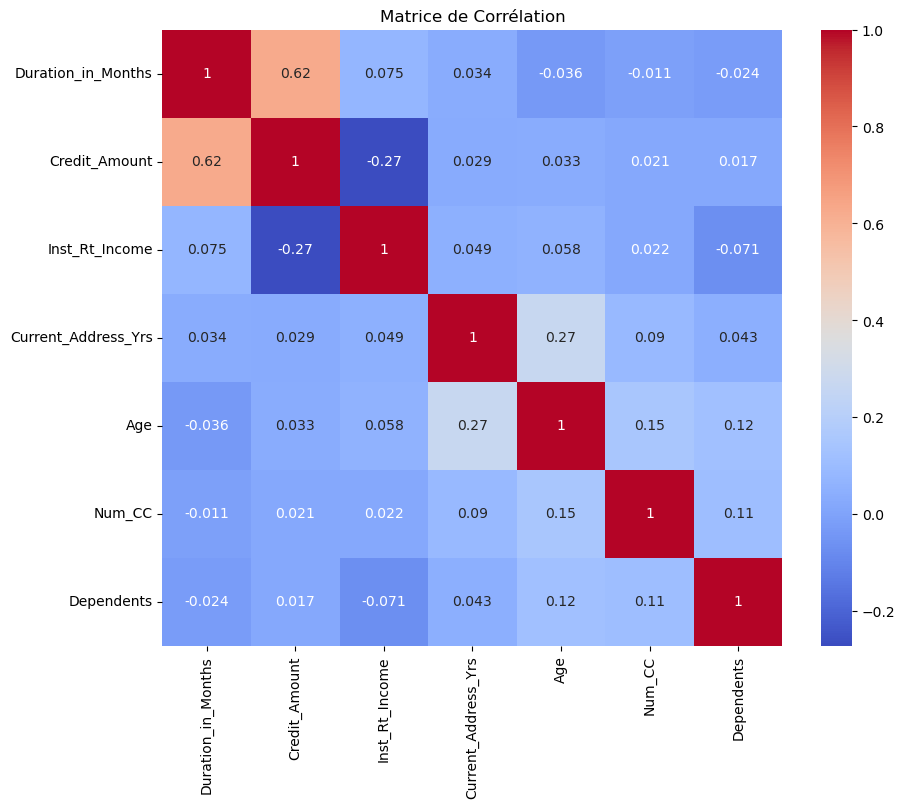

In [58]:
# Visualiser la matrice de corrélation avec une heatmap de seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de Corrélation")
plt.show()

# Créer des plots pour comprendre mieux notre dataset

In [59]:
# Créer des scatter plots
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

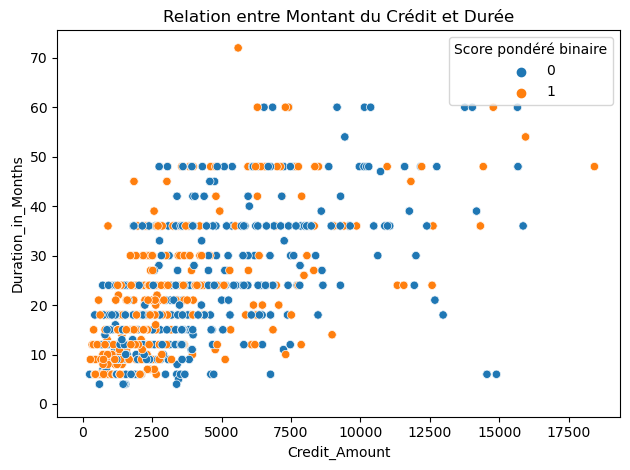

In [161]:
# Créer un scatter plot pour etudier la relation entre le montant de crédit et la durée 
plt.plot(1, 2, 1)
sns.scatterplot(data=db, x="Credit_Amount", y="Duration_in_Months", hue="Score pondéré binaire")
plt.title("Relation entre Montant du Crédit et Durée")
plt.tight_layout()
plt.show()

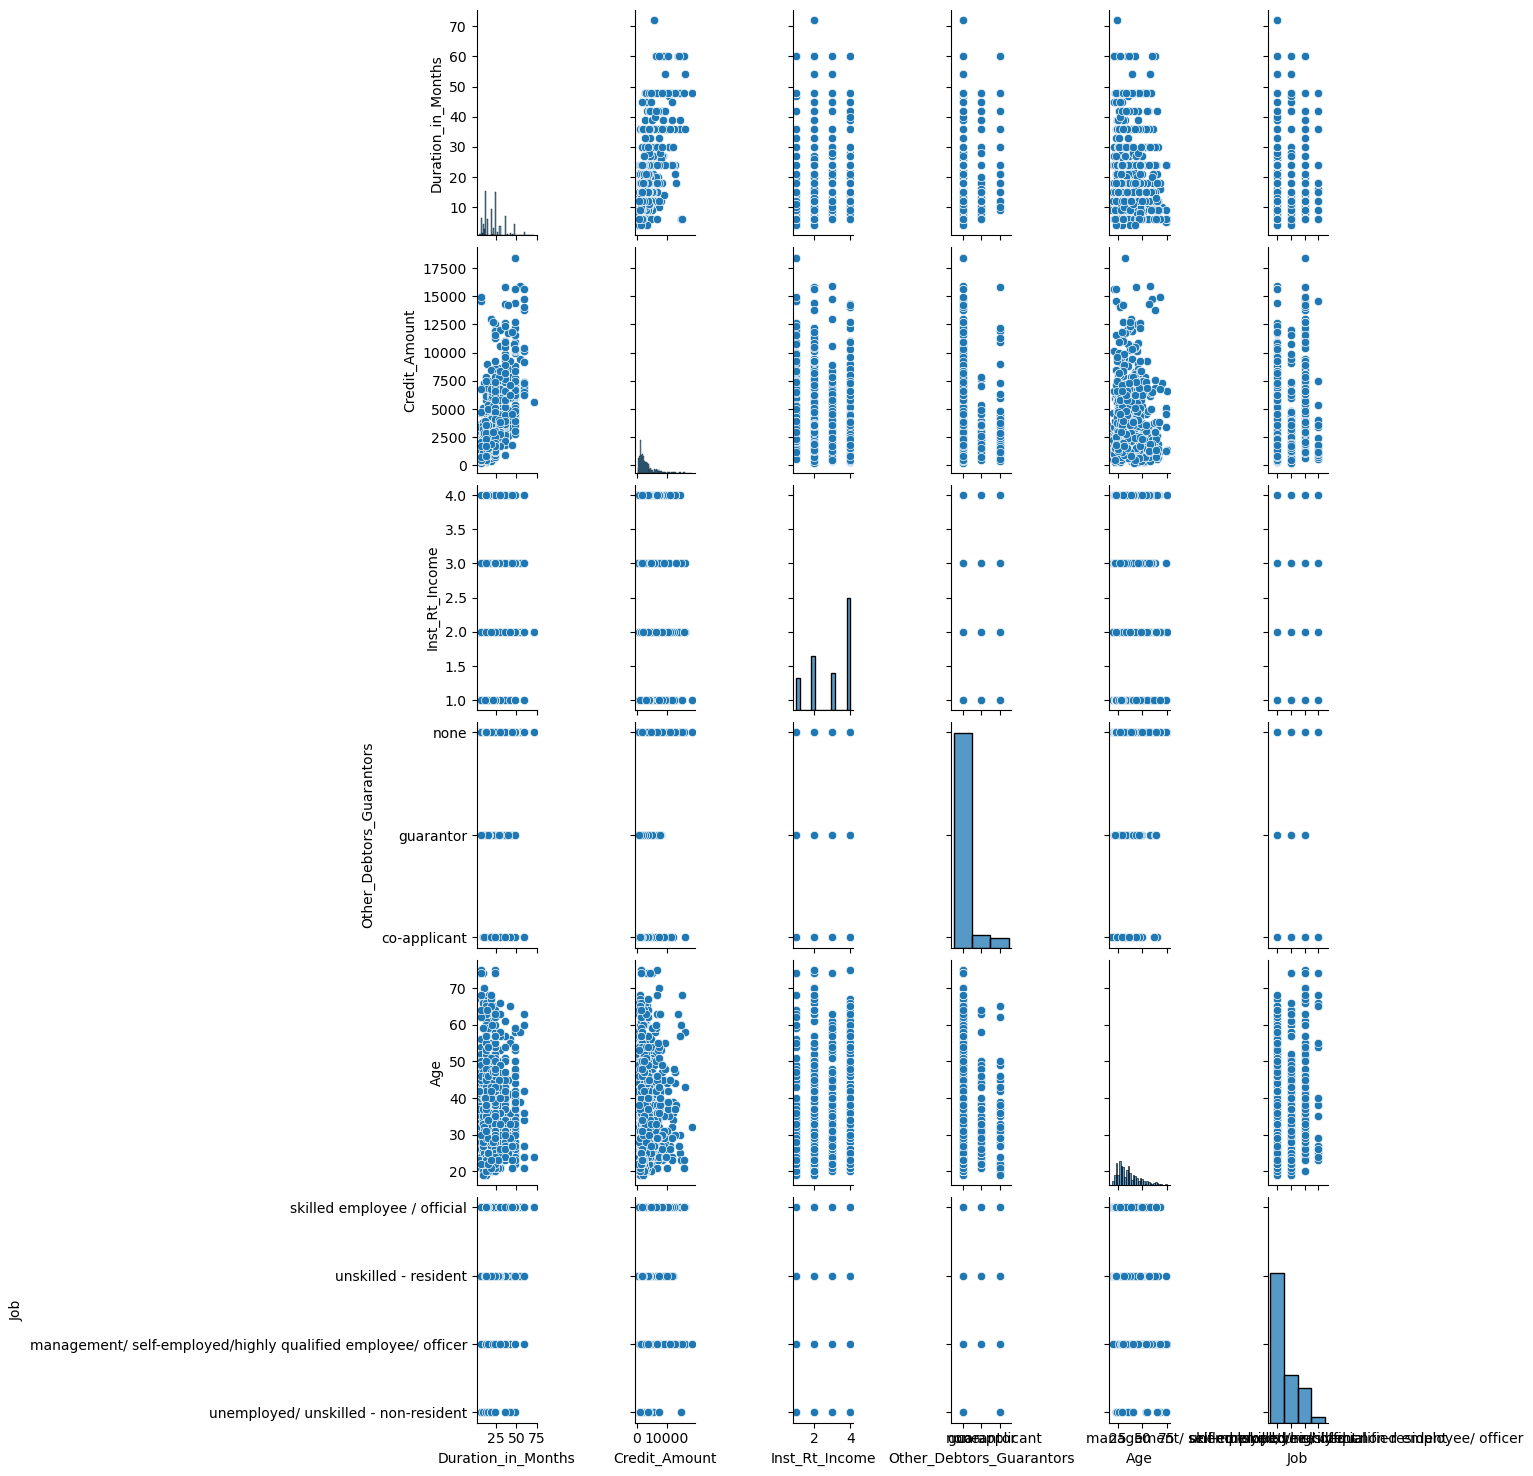

In [162]:
# Drawing pairplot
sns.pairplot(db, 
             vars=[ 'Duration_in_Months', 'Credit_Amount', 'Inst_Rt_Income','Other_Debtors_Guarantors',
         'Age', 'Job'],
             y_vars=['Score pondéré binaire'])
plt.show()

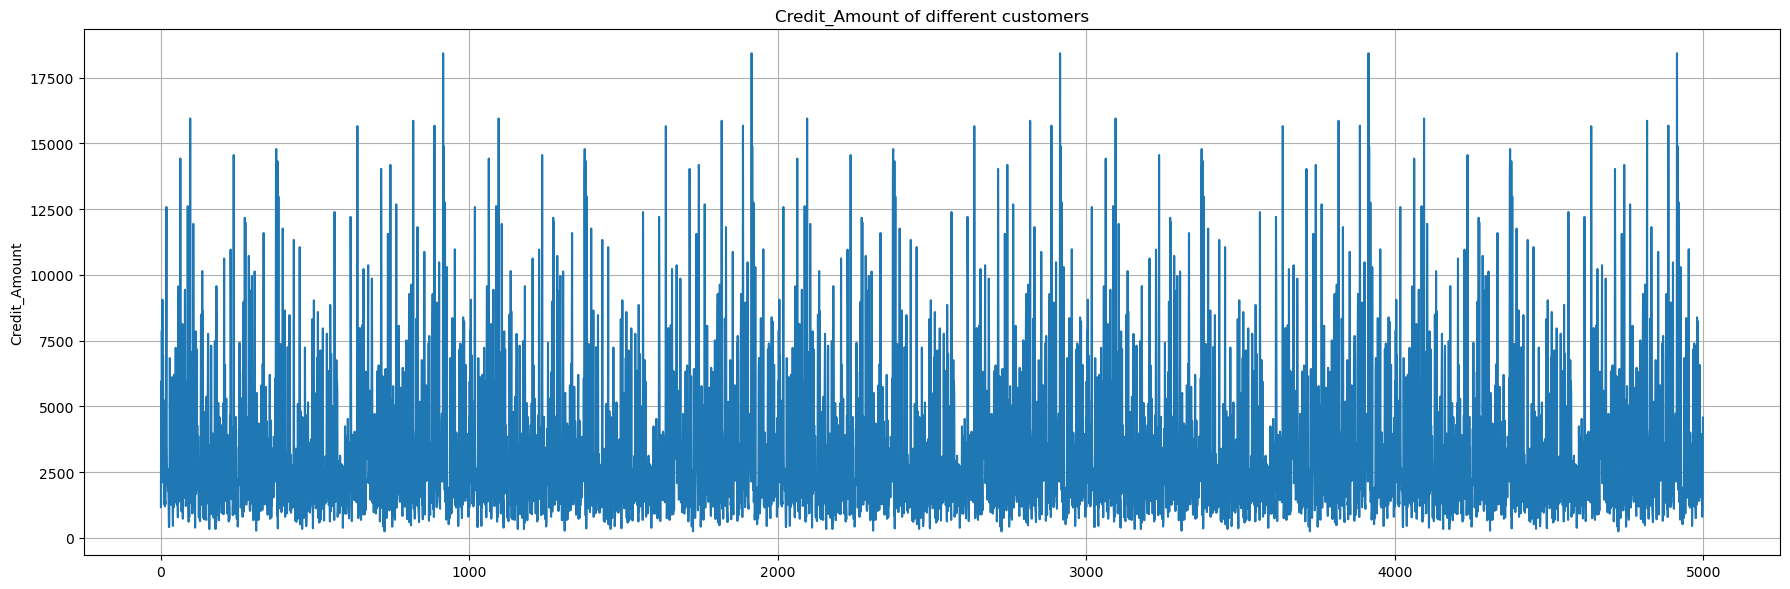

In [85]:
# Visualisation des montants de credits 
plt.figure(figsize=(18, 6))
data['Credit_Amount'].plot()
plt.title("Credit_Amount of different customers")
plt.ylabel("Credit_Amount")
plt.grid(True)
plt.tight_layout()
plt.show() 

Text(0.5, 1.0, 'Relation entre Montant du Crédit et Âge')

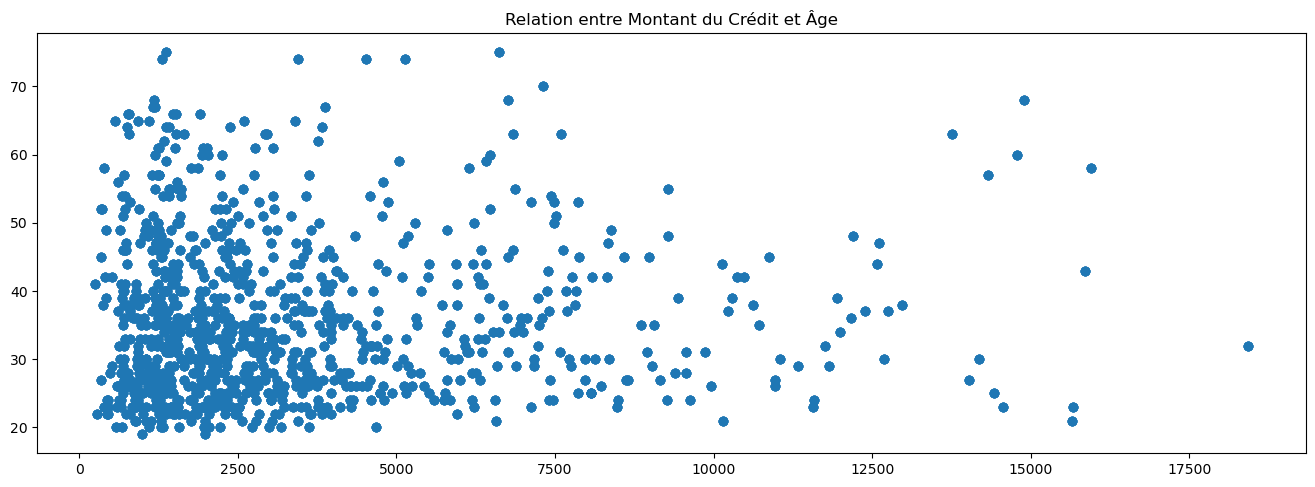

In [98]:
### Créer de visualisation pour voir la Relation entre Montant du Crédit et Âge
fig = plt.figure(figsize=(36, 12))
spec = gridspec.GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(spec[0, 0])
ax1.scatter(db["Credit_Amount"],db["Age"])
ax1.set_title("Relation entre Montant du Crédit et Âge")


Text(0.5, 1.0, 'Distribution de la Durée en Mois')

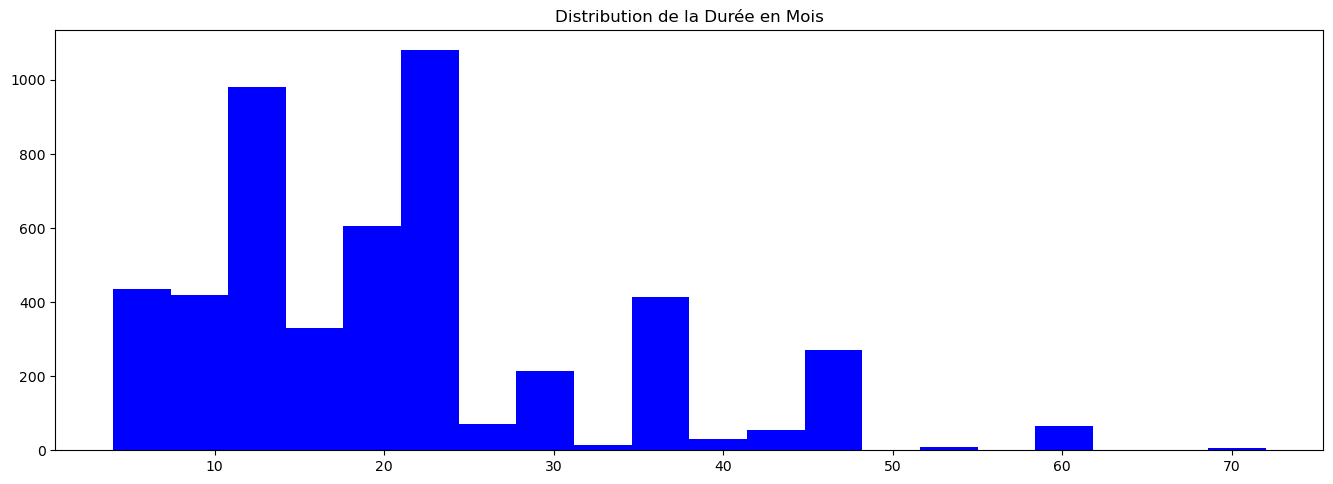

In [97]:
## Distribution de la Durée en Mois
fig = plt.figure(figsize=(36, 12))
spec = gridspec.GridSpec(2, 2, figure=fig)

ax2 = fig.add_subplot(spec[0, 1])
ax2.hist(db["Duration_in_Months"], bins=20, color="blue")
ax2.set_title("Distribution de la Durée en Mois")

Text(0.5, 1.0, "Âge en fonction du Type d'Emploi")

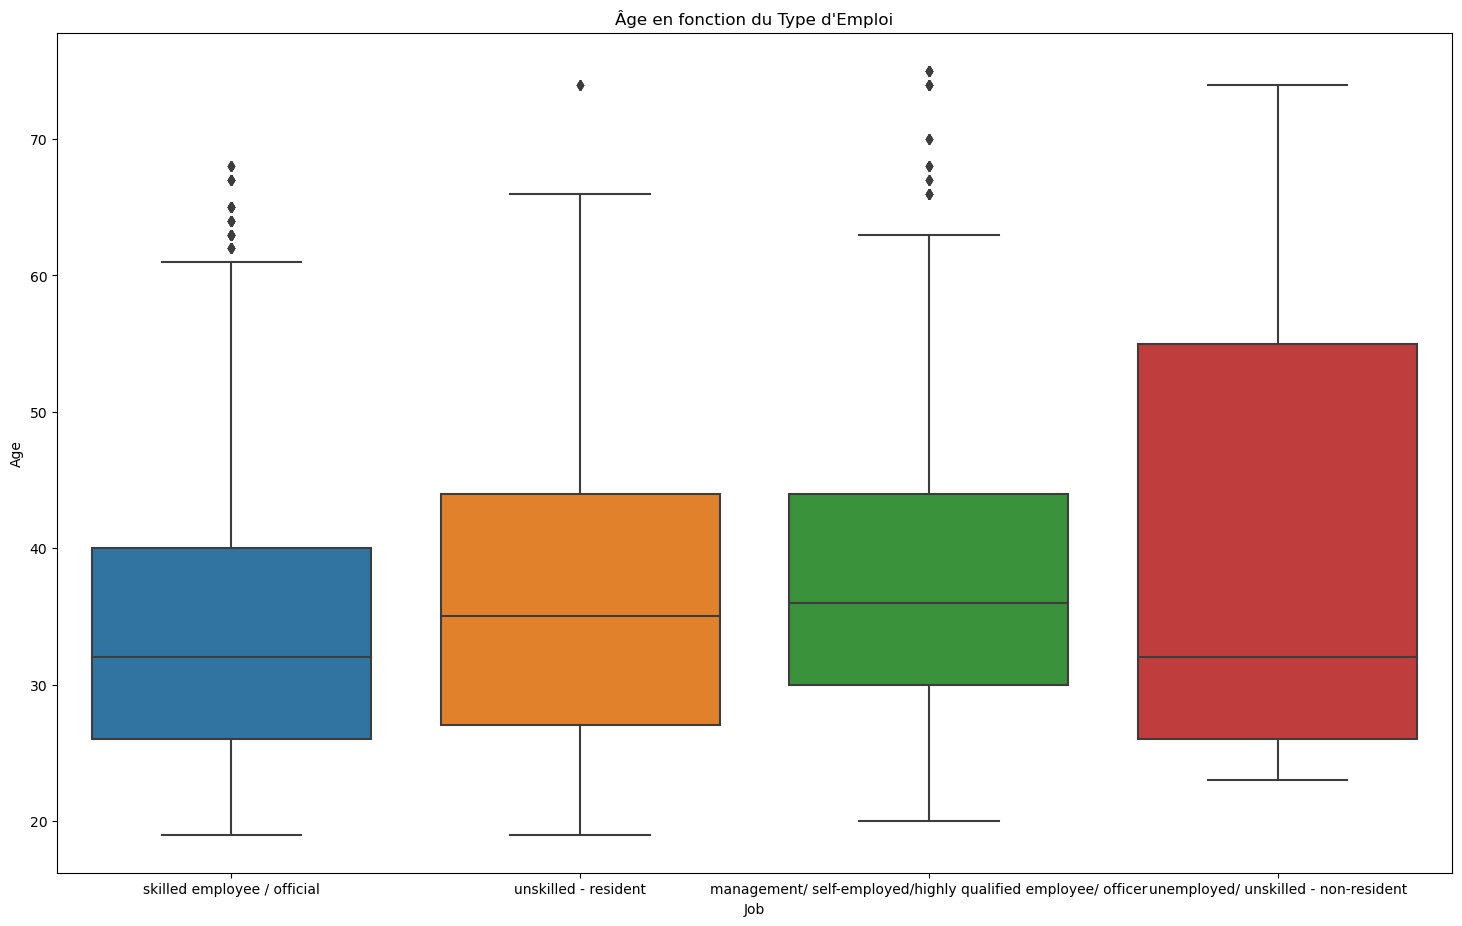

In [104]:
##Âge en fonction du Type d'Emploi
fig = plt.figure(figsize=(18, 24))
spec = gridspec.GridSpec(2, 2, figure=fig)

ax3 = fig.add_subplot(spec[1, :])
sns.boxplot(data=db, x="Job", y="Age")
ax3.set_title("Âge en fonction du Type d'Emploi")


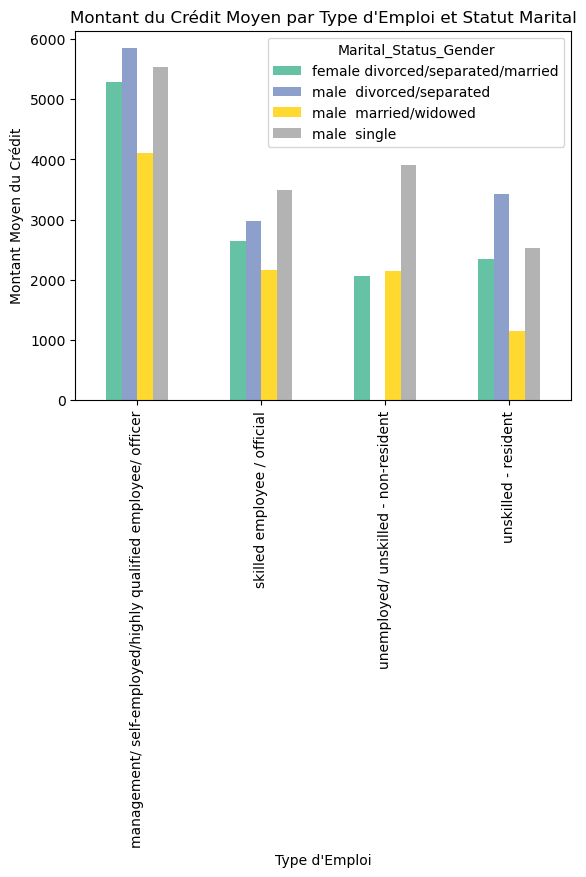

In [108]:
##Montant du Crédit Moyen par Type d'Emploi et Statut Marital
pivot_table = db.pivot_table(index="Job", columns="Marital_Status_Gender", values="Credit_Amount", aggfunc="mean")
pivot_table.plot(kind="bar", cmap="Set2")
plt.title("Montant du Crédit Moyen par Type d'Emploi et Statut Marital")
plt.ylabel("Montant Moyen du Crédit")
plt.xlabel("Type d'Emploi")
plt.show()

# Application de modèle régression logestique avec 80% de données entrainées et 20% à tester

In [142]:
X = datascore.drop(["Score pondéré binaire"], axis=1)  # Supprimer la colonnes Y
y = datascore["Score pondéré binaire"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Mesuring of Accuracy and R-squared (R2) 

In [166]:
accuracy = accuracy_score(y_test, y_pred)

print("Précision du modèle:", accuracy)

Précision du modèle: 0.995


In [167]:
r2 = r2_score(y_test, y_pred)
print("R-squared value:", r2)

R-squared value: 0.9799710782369742


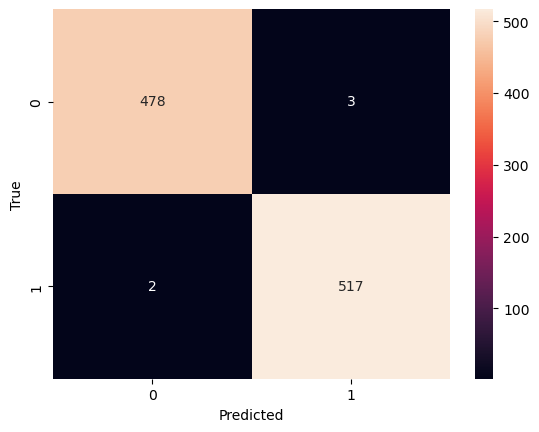

In [148]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()